In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [43]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

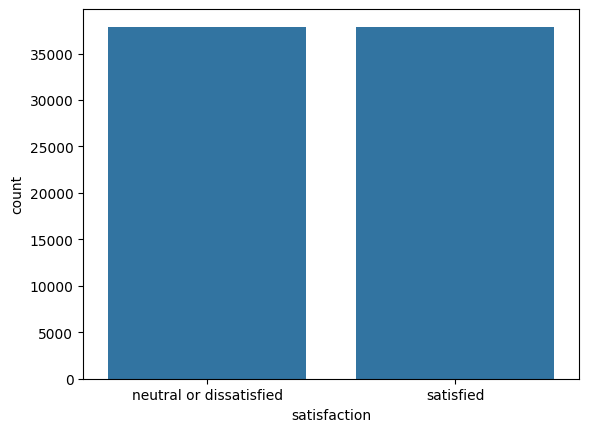

In [44]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [45]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,26,1127,0
75776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,28,1532,0
75777,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,38,3496,3
75778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,31,1919,0


In [46]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
75778    neutral or dissatisfied
75779    neutral or dissatisfied
Name: satisfaction, Length: 75780, dtype: object

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53046, 77) and test set is :(22734, 77)


In [48]:
from sklearn.preprocessing import MinMaxScaler
# ใช้ MinMaxScaler แปลง X_train ให้อยู่ในช่วง 0 ถึง 1
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[0.        , 0.        , 0.        , ..., 0.43589744, 0.30972194,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.28205128, 0.47960219,
        0.9       ],
       [0.        , 1.        , 0.        , ..., 0.28205128, 0.32778567,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.35897436, 0.45443475,
        0.43333333],
       [0.        , 1.        , 0.        , ..., 0.20512821, 0.50010148,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.34615385, 0.16480617,
        0.        ]])

## Set paramiter CV

In [49]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Naive-Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB

# ฟิตโมเดลด้วยข้อมูลที่ถูกแปลงแล้ว
model_naive = MultinomialNB()

start_time = time.time()  # เวลาเริ่มต้น
model_naive.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_NB = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.118727 วินาที


In [51]:

#Predict the accuracy of the model
y_pred_naive=model_naive.predict(X_test)

accuracy_NB=accuracy_score(y_pred_naive,y_test)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")

report=classification_report(y_test,y_pred_naive)
print("Classification Report is : \n",report)

Accuracy of Naive Bayes is : 85.89 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.84      0.86     11333
              satisfied       0.85      0.87      0.86     11401

               accuracy                           0.86     22734
              macro avg       0.86      0.86      0.86     22734
           weighted avg       0.86      0.86      0.86     22734



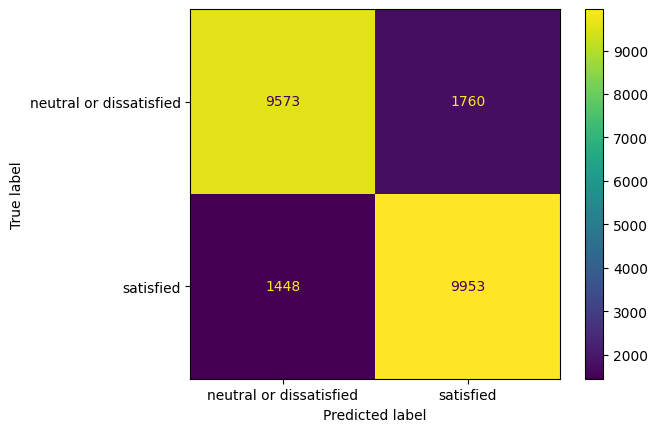

In [52]:
cm_2= confusion_matrix(y_test, y_pred_naive, labels=model_naive.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_naive.classes_)
disp_2.plot()

In [53]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_naive, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.86316087 0.85185185 0.85863726 0.85609273 0.85778909 0.85326548
 0.87075792 0.85520362 0.86170814 0.85576923 0.864819   0.86001131
 0.86029412 0.86340498 0.85888009]
Mean CV Accuracy: 0.8594
Standard Deviation CV Accuracy: 0.0047
เวลาที่ใช้ในการทำ Cross Validation: 1.638348 วินาที


In [54]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_naive.predict(X_train))
test_accuracy = accuracy_score(y_test, model_naive.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.8599517399992459
Test Accuracy: 0.858889768628486


## Save Model Predic

In [55]:
import pickle
pickle_out = open("../../pipelines/model_NB_business.pkl", mode = "wb")
pickle.dump(model_naive, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_NB.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [56]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
60891,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,35,791,0,neutral or dissatisfied
22389,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,31,2474,0,satisfied
21552,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,30,3084,0,satisfied
37063,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,41,602,7,satisfied
23139,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,46,2279,0,satisfied
35580,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,50,2551,0,neutral or dissatisfied
11781,0,0,0,0,0,1,0,0,0,0,...,1,0,1,1,0,1,14,1072,12,satisfied
62006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,30,1994,6,neutral or dissatisfied
65234,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,27,2697,1,neutral or dissatisfied
4935,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,54,1979,0,satisfied


In [57]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
60891,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,35,791,0
22389,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,31,2474,0
21552,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,1,30,3084,0
37063,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,41,602,7
23139,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,46,2279,0
35580,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,50,2551,0
11781,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,1,14,1072,12
62006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,30,1994,6
65234,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,27,2697,1
4935,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,54,1979,0


In [58]:
y_sam = df_sam.iloc[:,-1]
y_sam


60891    neutral or dissatisfied
22389                  satisfied
21552                  satisfied
37063                  satisfied
23139                  satisfied
35580    neutral or dissatisfied
11781                  satisfied
62006    neutral or dissatisfied
65234    neutral or dissatisfied
4935                   satisfied
67665    neutral or dissatisfied
68786    neutral or dissatisfied
38921    neutral or dissatisfied
33606                  satisfied
22321                  satisfied
14986    neutral or dissatisfied
28802                  satisfied
36195    neutral or dissatisfied
14766                  satisfied
30059    neutral or dissatisfied
Name: satisfaction, dtype: object

In [59]:
model = pickle.load(open("../../pipelines/model_NB_business.pkl", 'rb'))
scaler_NB = pickle.load(open("../../pipelines/scaler_NB.pkl", 'rb'))

scaler_new = scaler_NB.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

['neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'satisfied' 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied' 'satisfied' 'satisfied' 'neutral or dissatisfied']
Accuracy of Knn is : 85.0 % .
